<a href="https://colab.research.google.com/github/SamaraMoreira/GS-EcoOcean/blob/main/EcoOcean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Criação de um novo DataSet com a união dos datasets já apresentados anteriomente.

In [59]:
# Carregar os DataFrames
df_NewShorePollution = pd.read_csv('/content/NewShorePollution.csv', encoding='latin1')
df_NewWaterPollution = pd.read_csv('/content/NewWaterPollution.csv', encoding='latin1')

# Mesclar os DataFrames utilizando a coluna "Country"
df_merged = pd.merge(df_NewShorePollution, df_NewWaterPollution, on='Country', how='inner')

# Exibir apenas as primeiras 5 linhas do DataFrame mesclado
print(df_merged.head())

# Exibir uma amostra aleatória de 10 linhas do DataFrame mesclado
print(df_merged.sample(10))

# Opcional: salvar o DataFrame mesclado em um arquivo CSV para análise posterior
df_merged.to_csv('/content/MergedData.csv', index=False)


   Month  Season  Country  Pollution Level  Sample number  Organic matter%  \
0      8       4        1                0              1              NaN   
1      8       4        1                0              1              NaN   
2      8       4        1                0              1              NaN   
3      8       4        1                0              1              NaN   
4      8       4        1                0              1              NaN   

   Mean Number of Nematode species 1 per gram soil  \
0                                              5.7   
1                                              5.7   
2                                              5.7   
3                                              5.7   
4                                              5.7   

   Mean Number of Turbillaria per gram soil  \
0                                  0.155556   
1                                  0.155556   
2                                  0.155556   
3                 

In [60]:
# Carregar dataset com encoding especificado
df = pd.read_csv('/content/MergedData.csv', encoding='latin1')

In [61]:
df.head()

,Month,Season,Country,Pollution Level,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,Water pH,Soil pH,OC,Water Salinity,Soil Salinity,P,Total dissolved solids,PP,Conduction,ORP,Specific resistance,Temp ÃÂ©,Conductivity,Unnamed: 0,code,year,period,id,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
0,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
1,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,71176346.0,4.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
3,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
4,8,4,1,0,1,NaN,5.7,0.155556,NaN,NaN,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,NaN,43,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0175,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


In [62]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)




Colunas do DataFrame:
Index(['Month', 'Season', 'Country', 'Pollution Level', 'Sample number',
       'Organic matter%', 'Mean Number of Nematode species 1 per gram soil',
       'Mean Number of Turbillaria per gram soil',
       'Mean Number of foraminefera per gram soil',
       'Mean Number of Nematode species 2 per gram soil', 'Water pH',
       'Soil pH', 'OC', 'Water Salinity', 'Soil Salinity', 'P',
       'Total dissolved solids ', 'PP', 'Conduction', 'ORP',
       'Specific resistance ', 'Temp ÃÂ©', 'Conductivity', 'Unnamed: 0',
       'code', 'year', 'period', 'id', 'tourists', 'venue', 'rate', 'food',
       'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste',
       'waste_recycling'],
      dtype='object')


In [63]:
# Contabilizar os valores nulos em cada coluna
print("\nContagem de valores nulos em cada coluna:")
print(df.isnull().sum())


Contagem de valores nulos em cada coluna:
Month                                                  0
Season                                                 0
Country                                                0
Pollution Level                                        0
Sample number                                          0
Organic matter%                                    10863
Mean Number of Nematode species 1 per gram soil        0
Mean Number of Turbillaria per gram soil               0
Mean Number of foraminefera per gram soil          45416
Mean Number of Nematode species 2 per gram soil    45416
Water pH                                               0
Soil pH                                                0
OC                                                 15400
Water Salinity                                         0
Soil Salinity                                       4263
P                                                      0
Total dissolved solids                       

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139937 entries, 0 to 139936
Data columns (total 40 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Month                                            139937 non-null  int64  
 1   Season                                           139937 non-null  int64  
 2   Country                                          139937 non-null  int64  
 3   Pollution Level                                  139937 non-null  int64  
 4   Sample number                                    139937 non-null  int64  
 5   Organic matter%                                  129074 non-null  float64
 6   Mean Number of Nematode species 1 per gram soil  139937 non-null  float64
 7   Mean Number of Turbillaria per gram soil         139937 non-null  float64
 8   Mean Number of foraminefera per gram soil        94521 non-null   float64
 9   Mean Number of 

# Valores nulos

Preencher os valores nulos com a moda referente aquela coluna

In [65]:
import pandas as pd

# Suposição: o DataFrame 'df' já foi carregado anteriormente

# Identificar colunas do tipo float64 ou int64 com valores nulos
colunas_numericas_nulas = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]

# Filtrar apenas as colunas com valores nulos
colunas_numericas_nulas = colunas_numericas_nulas[df[colunas_numericas_nulas].isnull().any()]

# Criar uma cópia do DataFrame original para ser o dftratado
dftratado = df.copy()

# Preencher os valores nulos nas colunas do tipo float64 ou int64 com a moda
for coluna in colunas_numericas_nulas:
    moda = dftratado[coluna].mode()[0]  # Calcular a moda da coluna
    dftratado[coluna].fillna(moda, inplace=True)  # Preencher os valores nulos com a moda

# Verificar se ainda há valores nulos
print("Contagem de valores nulos em cada coluna após preenchimento:")
print(dftratado.isnull().sum())



Contagem de valores nulos em cada coluna após preenchimento:
Month                                              0
Season                                             0
Country                                            0
Pollution Level                                    0
Sample number                                      0
Organic matter%                                    0
Mean Number of Nematode species 1 per gram soil    0
Mean Number of Turbillaria per gram soil           0
Mean Number of foraminefera per gram soil          0
Mean Number of Nematode species 2 per gram soil    0
Water pH                                           0
Soil pH                                            0
OC                                                 0
Water Salinity                                     0
Soil Salinity                                      0
P                                                  0
Total dissolved solids                             0
PP                                    

# Ánalise do novo DataSet gerado

In [66]:
# Calcular a matriz de correlação
df_numerico = dftratado.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
correlacao = df_numerico.corr()

# Criar um ranking das variáveis com base na correlação com outras variáveis
ranking_correlacao = correlacao.unstack().sort_values(ascending=False)

# Remover as correlações de uma variável com ela mesma
ranking_correlacao = ranking_correlacao[ranking_correlacao > 0.0]
ranking_correlacao = ranking_correlacao[ranking_correlacao != 1.0]
# Exibir o ranking das variáveis
print("Ranking das variáveis com base na correlação:")
print(ranking_correlacao)


Ranking das variáveis com base na correlação:
metal                                            plastic                                            1.000000
plastic                                          metal                                              1.000000
metal                                            green_waste                                        1.000000
green_waste                                      metal                                              1.000000
                                                 plastic                                            1.000000
plastic                                          green_waste                                        1.000000
Conduction                                       Total dissolved solids                             0.997984
Total dissolved solids                           Conduction                                         0.997984
tourists                                         glass                            

In [67]:
colunas_relacionadas = ['metal', 'plastic', 'green_waste', 'Conduction', 'Total dissolved solids ',
                        'tourists', 'Water Salinity', 'Country', 'other', 'waste_recycling',
                        'paper', 'Conductivity', 'rate', 'Temp ÃÂ©', 'glass', 'food',
                        'Specific resistance ', 'year', 'PP', 'OC', 'Soil Salinity',
                        'Mean Number of foraminefera per gram soil']

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


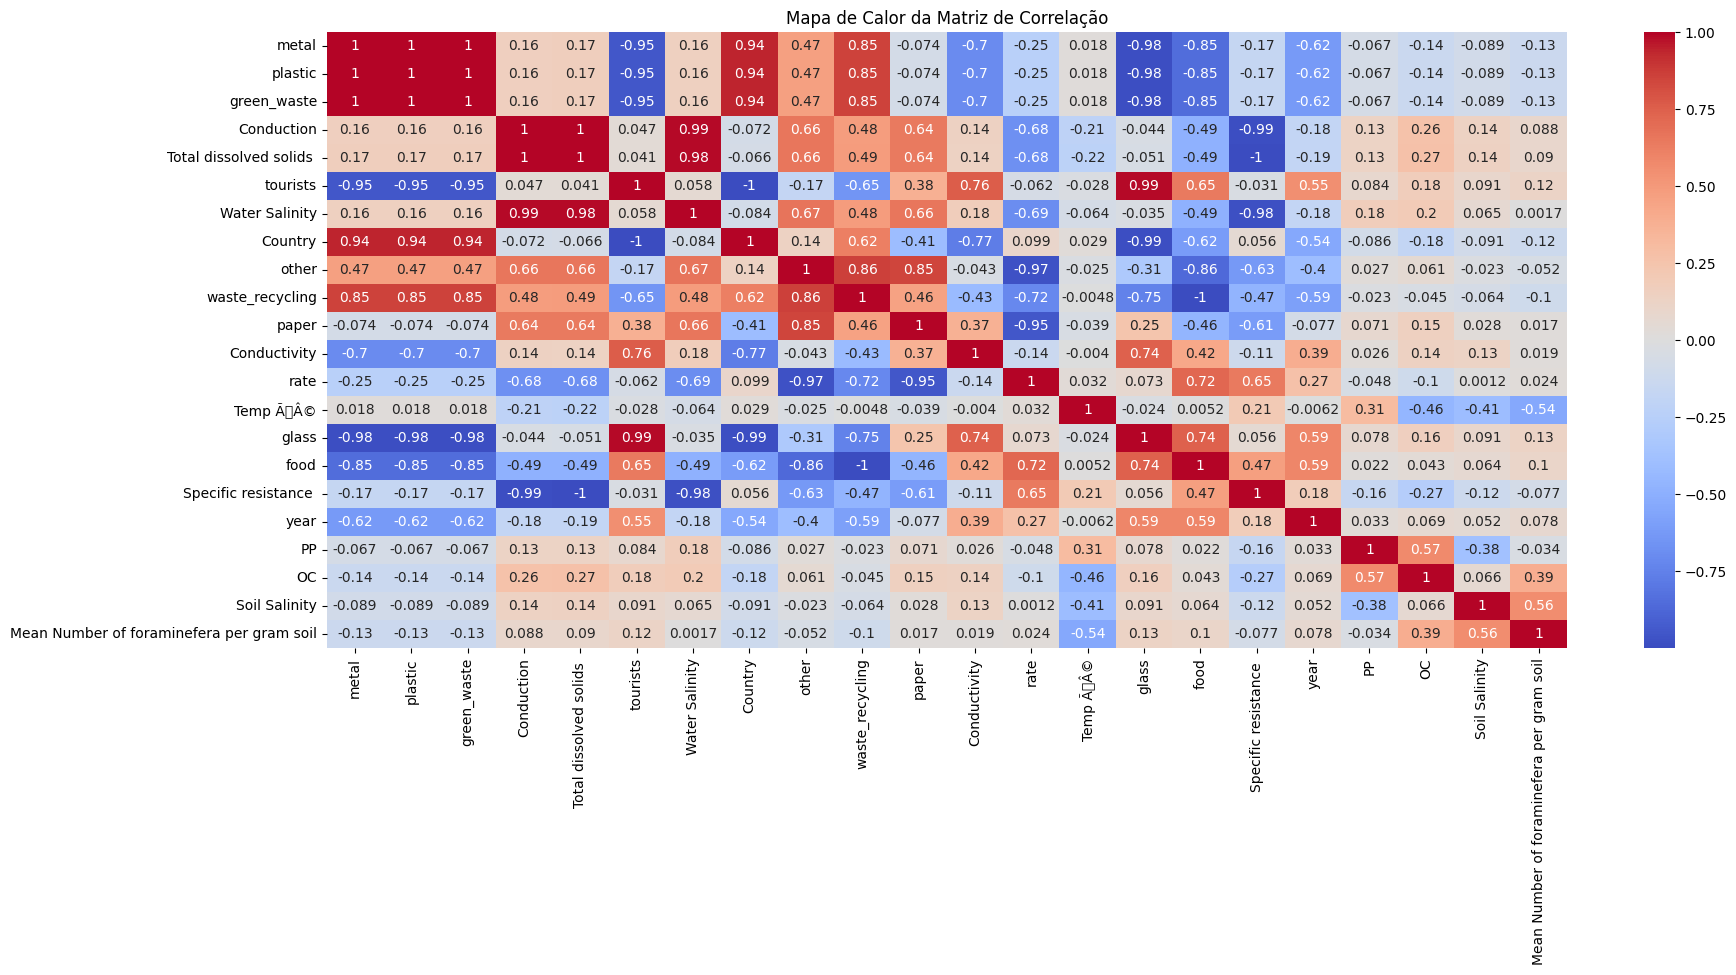

In [68]:
# Selecionar apenas as colunas desejadas
dados_selecionados = dftratado[colunas_relacionadas]

# Calcular a matriz de correlação
correlacao = dados_selecionados.corr()

# Ajustar o tamanho da figura
plt.figure(figsize=(20, 8))

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

A partir das estatísticas descritivas fornecidas, podemos tirar várias conclusões sobre os dados analisados. :

### Geral
1. **Número de Amostras:**
   - Existem 139937 observações em todos os parâmetros.

### Variáveis Temporais e Locacionais
2. **Month (Mês):**
   - Média: 6.57 (aproximadamente junho).
   - Desvio padrão: 4.99, indicando uma distribuição relativamente uniforme ao longo do ano.
   - Variação de 1 a 18, sugerindo que a codificação do mês pode incluir algum erro ou meses de diferentes anos.

3. **Season (Estação):**
   - Média: 2.27, com 4 estações (1 a 4), provavelmente indicando Primavera (2).

4. **Country (País):**
   - Média: 1.75, com 3 países representados (1 a 3).

### Poluição e Qualidade do Solo
5. **Pollution Level (Nível de Poluição):**
   - Média: 0.55, com um desvio padrão de 0.69.
   - A maior parte dos dados (75%) tem um nível de poluição de 1 ou menos.

6. **Organic matter% (Matéria Orgânica %):**
   - Média: 0.49%, indicando uma quantidade moderada de matéria orgânica no solo.

7. **Nematode Species 1 per gram soil:**
   - Média: 6.03, mas com um desvio padrão alto (6.28), indicando variação significativa.

8. **Turbillaria per gram soil:**
   - Média muito baixa (0.15), indicando que esses organismos são raros no solo analisado.

9. **Foraminefera per gram soil:**
   - Média de 10.24, com uma alta variação (12.68).

10. **Nematode Species 2 per gram soil:**
    - Média: 4.47, também com alta variação (7.18).

### Propriedades Químicas da Água e do Solo
11. **Water pH e Soil pH:**
    - pH da água média: 8.20, ligeiramente alcalino.
    - pH do solo média: 8.24, também alcalino.

12. **OC (Carbono Orgânico):**
    - Média: 8.11, indicando uma quantidade moderada de carbono orgânico no solo.

13. **Water Salinity e Soil Salinity:**
    - Salinidade da água média: 38.32, indicando águas salinas.
    - Salinidade do solo média: 9.88, também relativamente alta.

### Parâmetros de Contaminação
14. **Conduction e Conductivity:**
    - Ambas com médias acima de 57000, sugerindo altos níveis de condução e condutividade no solo e na água.

15. **Total dissolved solids (Sólidos Totais Dissolvidos):**
    - Média alta: 57554.65, sugerindo um ambiente com muitos sólidos dissolvidos.

### Parâmetros de Resíduos
16. **Rate, Food, Glass, Metal, Other, Paper, Plastic:**
    - Dados como "food", "glass" e "metal" têm valores bastante específicos e consistentes.
    - Por exemplo, "food" tem uma média de 29.12 e "glass" de 7.29, enquanto "metal" tem uma média de 3.16, indicando a composição dos resíduos.

17. **Green Waste (Resíduos Verdes) e Waste Recycling (Reciclagem de Resíduos):**
    - Green Waste: Média muito baixa (0.86), sugerindo baixa quantidade de resíduos verdes.
    - Waste Recycling: Média de 23.21, com um desvio padrão relativamente baixo (3.23), indicando um nível consistente de reciclagem.

### Outros Parâmetros
18. **ORP (Potencial de Redox):**
    - Média negativa (-80.25), indicando condições redutoras.

19. **Temp (Temperatura):**
    - Média de 23.73°C, com uma ampla variação (de 14.7°C a 31.18°C).

### Conclusões Gerais
- **Estabilidade Ambiental:** A maioria dos parâmetros, como pH, salinidade e níveis de matéria orgânica, são estáveis, com algumas variações sazonais e geográficas.
- **Biodiversidade do Solo:** A biodiversidade do solo (nematoides, turbellaria e foraminíferos) mostra uma variação significativa, sugerindo diferentes condições ambientais.
- **Contaminação e Qualidade do Solo/Água:** Altos níveis de sólidos dissolvidos e salinidade indicam potencial contaminação ou características naturais de alta salinidade.
- **Gestão de Resíduos:** A reciclagem de resíduos parece ser uma prática comum, com quantidades moderadas de resíduos de papel, plástico e metais.


In [69]:
print(dftratado.describe())

               Month         Season        Country  Pollution Level  \
count  139937.000000  139937.000000  139937.000000    139937.000000   
mean        6.570007       2.268199       1.751724         0.550369   
std         4.985497       1.018997       0.906657         0.692923   
min         1.000000       1.000000       1.000000         0.000000   
25%         3.000000       1.000000       1.000000         0.000000   
50%         5.000000       2.000000       1.000000         0.000000   
75%         9.000000       3.000000       3.000000         1.000000   
max        18.000000       4.000000       3.000000         2.000000   

       Sample number  Organic matter%  \
count  139937.000000    139937.000000   
mean        6.358769         0.487356   
std         3.796317         0.263471   
min         1.000000         0.121183   
25%         3.000000         0.293687   
50%         6.000000         0.414801   
75%         9.000000         0.671808   
max        14.000000         1.8

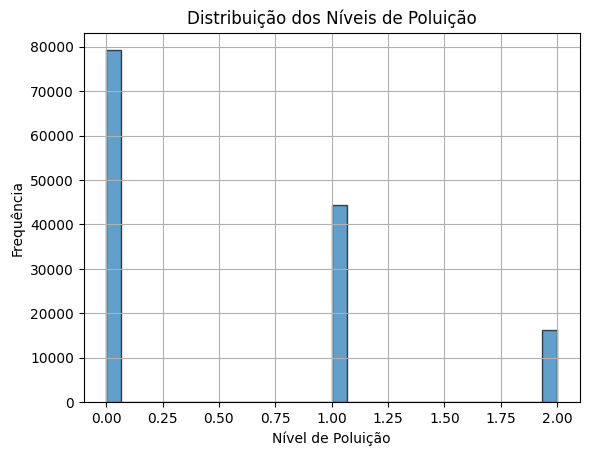

In [70]:
# Histograma dos níveis de poluição
plt.hist(dftratado['Pollution Level'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição dos Níveis de Poluição')
plt.xlabel('Nível de Poluição')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Coluna "Pollution Level"

### Observações:
1. **Distribuição:**
   - A maioria dos valores estão concentrados entre 0 e 1, com 75% dos valores sendo 1 ou menores.
   - A mediana é 0, indicando que pelo menos metade dos dados tem um nível de poluição igual a 0.
   - O valor máximo é 2.

2. **Média e Desvio Padrão:**
   - A média é 0.55, o que sugere que a maioria dos valores de poluição estão abaixo de 1.
   - O desvio padrão é 0.69, indicando uma variação moderada nos níveis de poluição.

3. **Interpretação dos Níveis de Poluição:**
   - **0:** Sem poluição.
   - **1:** Nível moderado de poluição.
   - **2:** Alto nível de poluição.

# Primeira hipótese

Tendências Temporais: Podemos explorar se há padrões sazonais ou tendências ao longo do tempo em relação às coleta de lixo. Isso pode ser feito visualizando graficamente os dados ao longo dos meses.

In [71]:
# Exibir os valores únicos na coluna 'Month'
print(dftratado['Month'].unique())
mes_mais_comum = dftratado['Month'].mode()[0]

# Em seguida, substituímos os valores 18 pelo mês mais comum
dftratado['Month'] = dftratado['Month'].replace(18, mes_mais_comum)

# Exibir os valores únicos na coluna 'Month'
print(dftratado['Month'].unique())

[ 8  9 11  1  3  5 18]
[ 8  9 11  1  3  5]


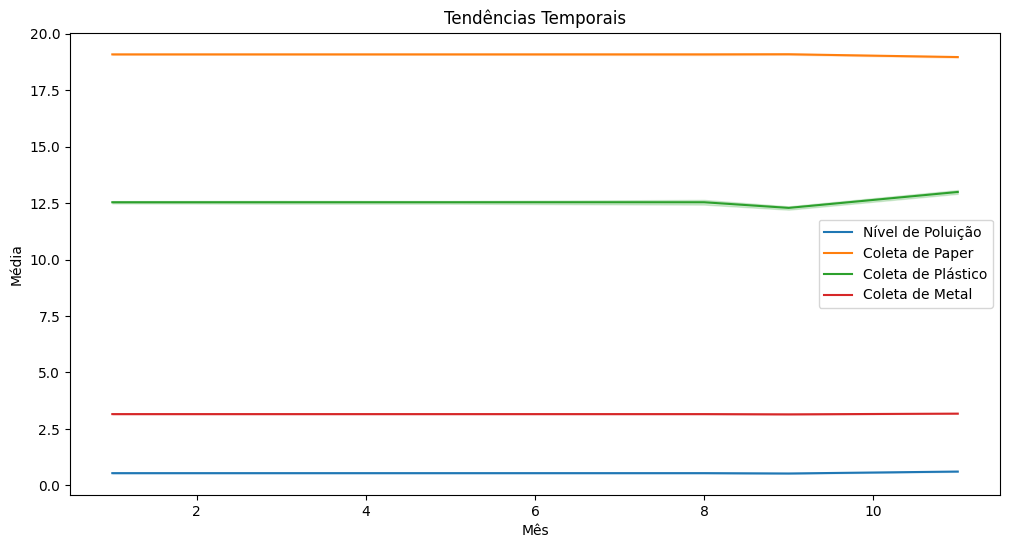

In [72]:
# Plote os dados
plt.figure(figsize=(12, 6))
sns.lineplot(data=dftratado, x='Month', y='Pollution Level', label='Nível de Poluição')
sns.lineplot(data=dftratado, x='Month', y='paper', label='Coleta de Paper')
sns.lineplot(data=dftratado, x='Month', y='plastic', label='Coleta de Plástico')
sns.lineplot(data=dftratado, x='Month', y='metal', label='Coleta de Metal')
# Adicione outras linhas para cada tipo de material que você tem no seu conjunto de dados
plt.title('Tendências Temporais')
plt.xlabel('Mês')
plt.ylabel('Média')
plt.legend()
plt.show()

# Quantidade de tipo de lixo por mês

Tipo de lixo: paper
Mês 8: 184050.5 unidades
Mês 9: 356590.89999999997 unidades
Mês 11: 324101.0 unidades
Mês 1: 773012.1 unidades
Mês 3: 515341.4 unidades
Mês 5: 515341.4 unidades


Tipo de lixo: plastic
Mês 8: 120908.99999999999 unidades
Mês 9: 229516.19999999998 unidades
Mês 11: 222018.0 unidades
Mês 1: 507817.79999999993 unidades
Mês 3: 338545.19999999995 unidades
Mês 5: 338545.19999999995 unidades


Tipo de lixo: glass
Mês 8: 70499.0 unidades
Mês 9: 139658.19999999998 unidades
Mês 11: 118997.99999999999 unidades
Mês 1: 296095.8 unidades
Mês 3: 197397.2 unidades
Mês 5: 197397.2 unidades


Tipo de lixo: metal
Mês 8: 30457.5 unidades
Mês 9: 58783.5 unidades
Mês 11: 54315.0 unidades
Mês 1: 127921.5 unidades
Mês 3: 85281.0 unidades
Mês 5: 85281.0 unidades


Tipo de lixo: other
Mês 8: 244269.0 unidades
Mês 9: 471364.19999999995 unidades
Mês 11: 431337.99999999994 unidades
Mês 1: 1025929.7999999999 unidades
Mês 3: 683953.2 unidades
Mês 5: 683953.2 unidades


Tipo de lixo: green_waste
Mês

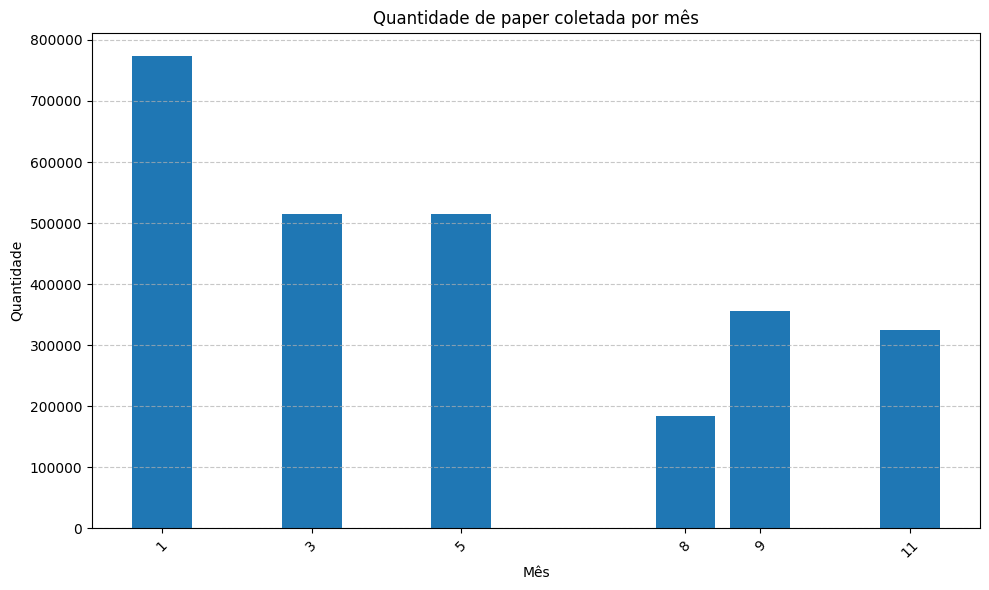

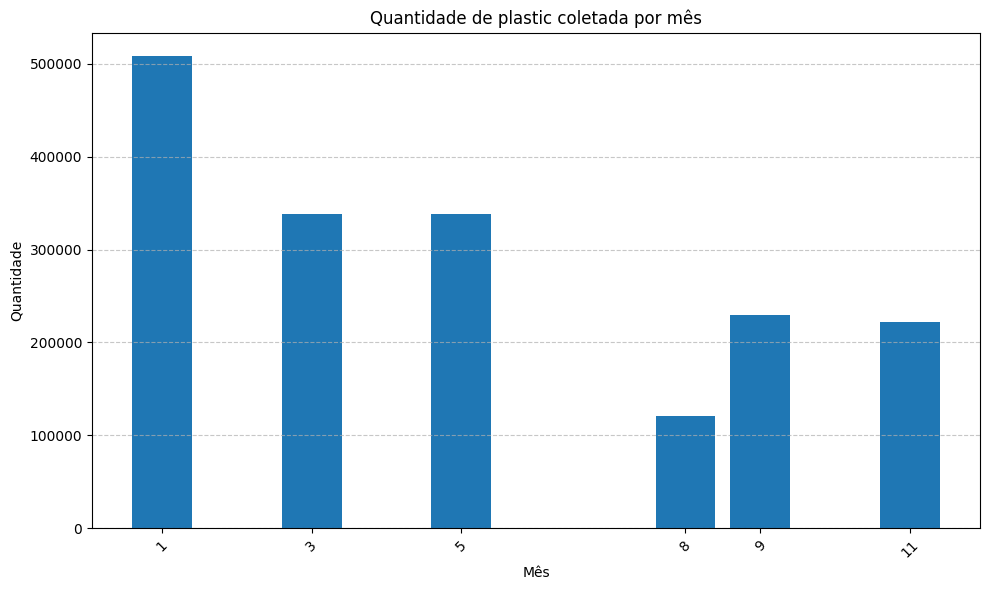

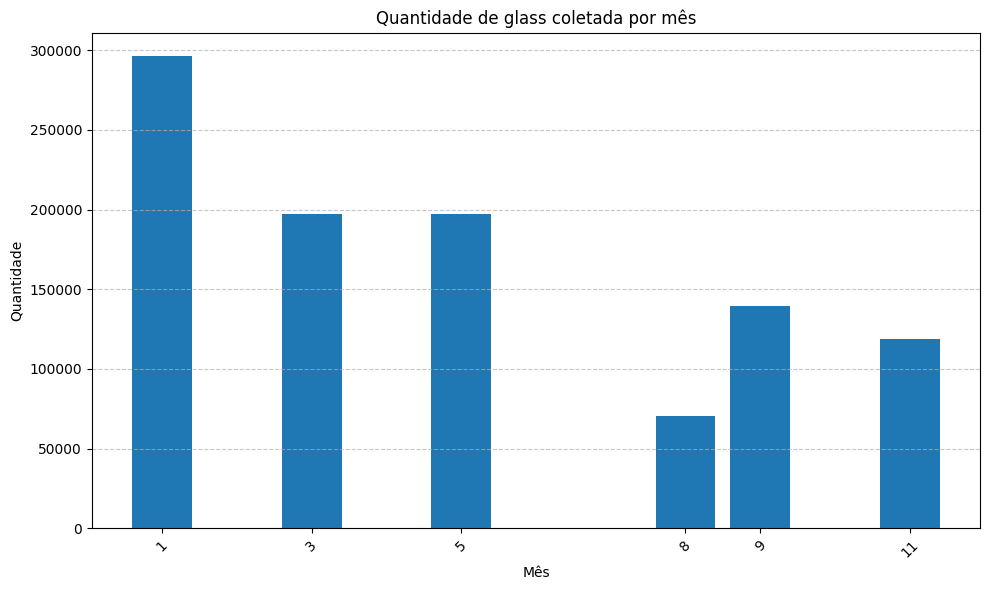

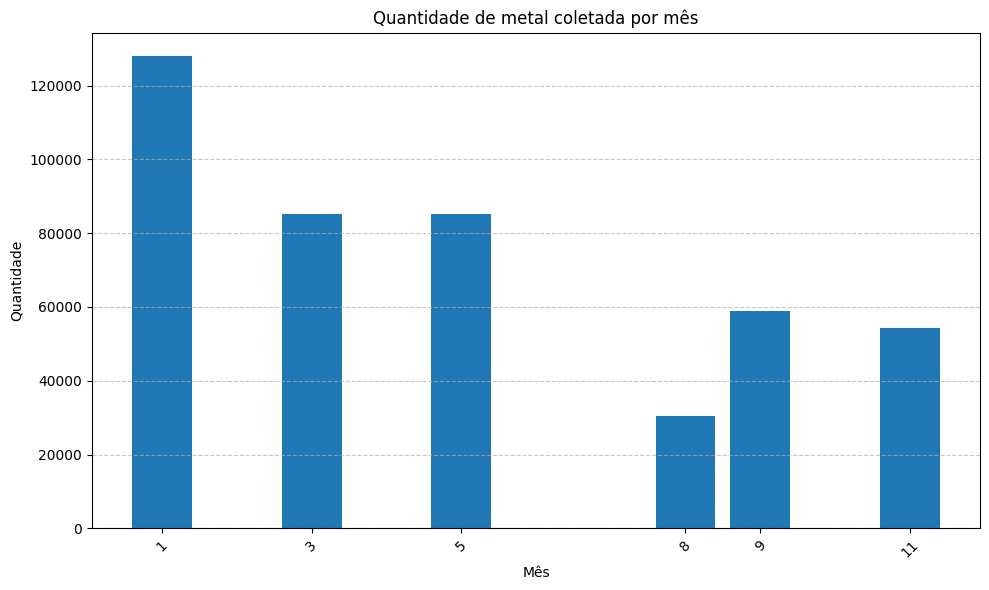

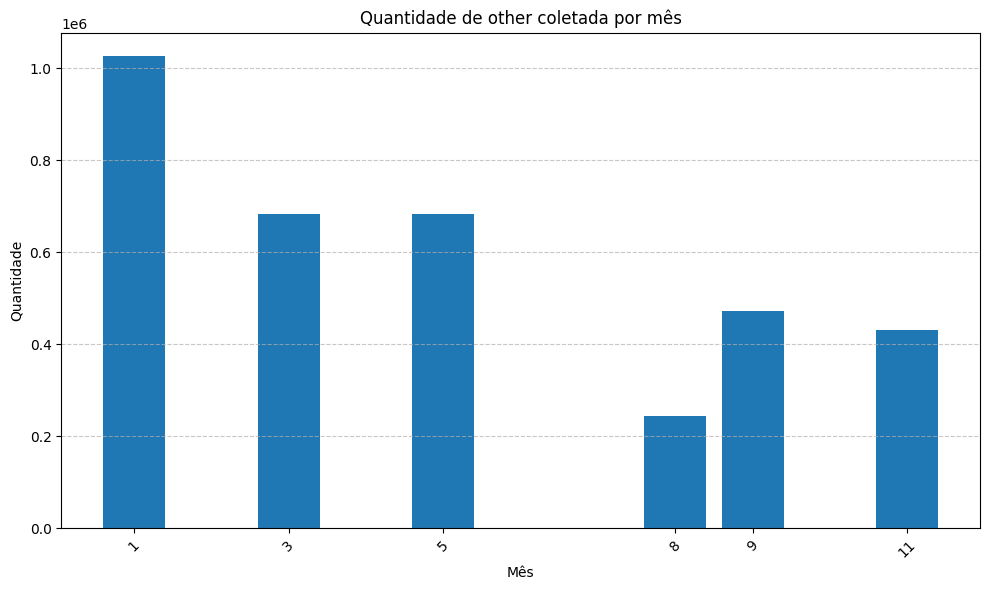

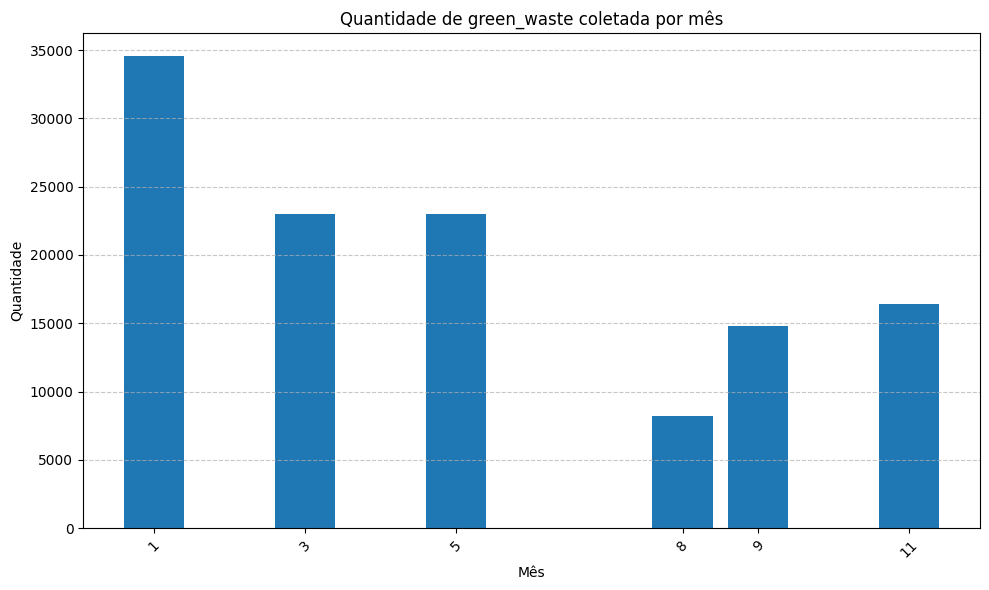

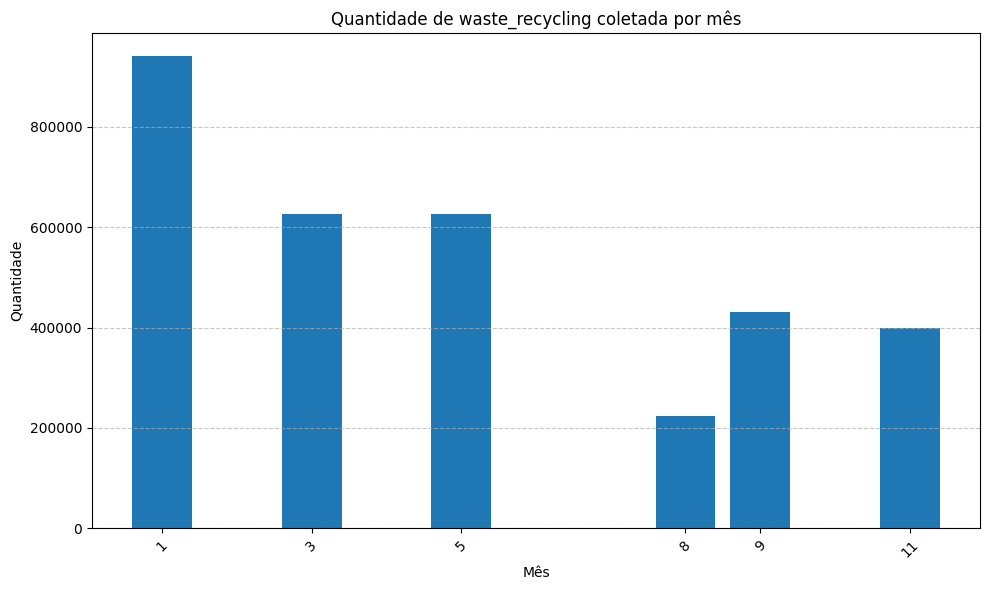

In [73]:
# Selecionando apenas as colunas relevantes para análise
colunas_lixo = ['Month', 'paper', 'plastic', 'glass', 'metal', 'other', 'green_waste', 'waste_recycling']
dados_lixo = dftratado[colunas_lixo]

# Agrupando os dados por mês e somando as quantidades de cada tipo de lixo
total_por_mes = dados_lixo.groupby('Month').sum()

# Iterar sobre cada coluna e imprimir os valores de cada tipo de lixo coletado por mês
for coluna in colunas_lixo[1:]:  # Ignorando a coluna 'Month' na iteração
    print(f"Tipo de lixo: {coluna}")
    for mes in dados_lixo['Month'].unique():
        quantidade = dados_lixo.loc[dados_lixo['Month'] == mes, coluna].sum()
        print(f"Mês {mes}: {quantidade} unidades")
    print("\n")


# Plotando gráficos de barras para cada tipo de lixo
for coluna in total_por_mes.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(total_por_mes.index, total_por_mes[coluna])
    plt.title(f"Quantidade de {coluna} coletada por mês")
    plt.xlabel("Mês")
    plt.ylabel("Quantidade")
    plt.xticks(total_por_mes.index, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


#Tendências Temporais

 Com base nos dados fornecidos sobre a quantidade de diferentes tipos de lixo coletados por mês e nas análises das maiores e menores quantidades coletadas para cada tipo de lixo, podemos tirar algumas conclusões e formular algumas hipóteses:

1. **Padrões Sazonais:**
   - Para a maioria dos tipos de lixo, os meses de janeiro (Mês 1) apresentam consistentemente as maiores quantidades coletadas. Isso pode estar relacionado ao início do ano, quando as atividades industriais e de consumo muitas vezes aumentam após as festas de fim de ano.
   - Por outro lado, os meses de agosto (Mês 8) tendem a ter as menores quantidades coletadas para a maioria dos tipos de lixo. Isso pode refletir uma diminuição nas atividades industriais e de consumo durante os meses de verão em algumas regiões.

2. **Reciclagem e Conscientização Ambiental:**
   - A quantidade de resíduos reciclados (waste_recycling) parece seguir um padrão semelhante aos outros tipos de lixo, com maiores quantidades coletadas em janeiro e menores em agosto. Isso sugere que os esforços de reciclagem podem ser influenciados por fatores sazonais semelhantes aos que afetam a produção de resíduos em geral.

3. **Possíveis Fatores Contribuintes:**
   - Os picos de coleta de resíduos em janeiro podem estar relacionados a várias atividades, como limpeza pós-festas, renovações de ano novo, retorno ao trabalho após as férias e aumento das compras devido a vendas de pós-natal.
   - Os menores volumes de coleta em agosto podem ser atribuídos a férias de verão, redução da atividade industrial e menor consumo em algumas áreas devido às férias de verão.

4. **Impacto da Estação do Ano:**
   - É possível que as variações na quantidade de resíduos coletados ao longo do ano também estejam relacionadas às condições climáticas e à sazonalidade de certas atividades, como jardinagem e construção.

# Relação entre a coleta de lixo e o nível de poluição:

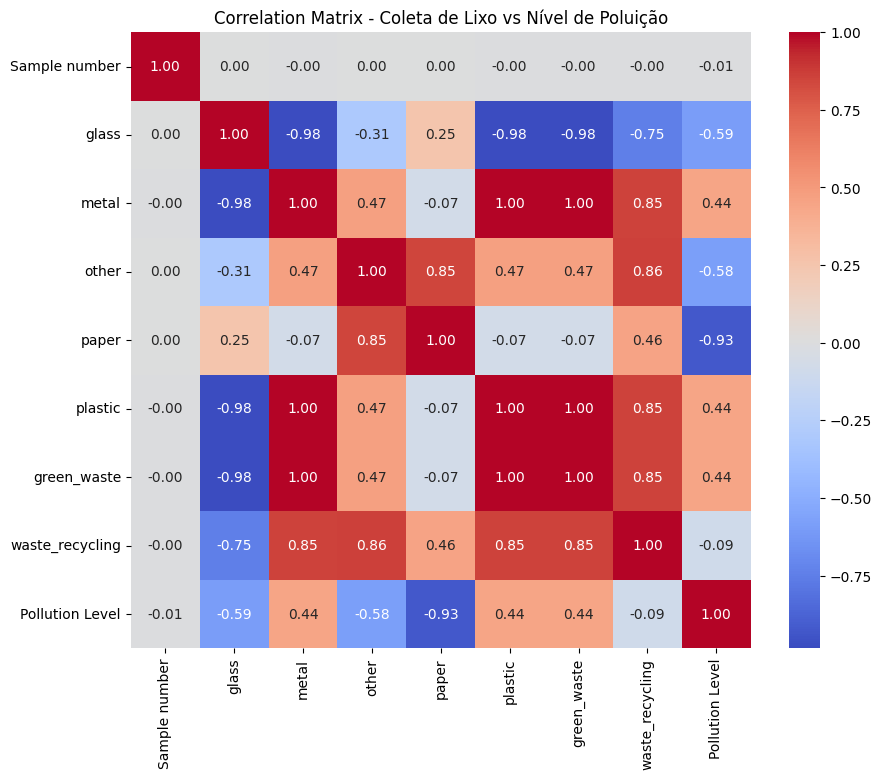

In [75]:
# Selecionando as colunas relevantes
cols_coleta_lixo = ['Sample number', 'glass', 'metal', 'other', 'paper', 'plastic', 'green_waste', 'waste_recycling', 'Pollution Level']
df_coleta_lixo = dftratado[cols_coleta_lixo]

# Calculando a matriz de correlação
correlation_matrix = df_coleta_lixo.corr()

# Visualizando a matriz de correlação como um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Coleta de Lixo vs Nível de Poluição')
plt.show()

Analisando a matriz de correlação, podemos observar o seguinte:

Correlações Positivas Fortes:

Há uma forte correlação positiva entre os tipos de resíduos "metal", "plástico", "green_waste" e "waste_recycling". Isso sugere que esses tipos de resíduos são frequentemente coletados juntos ou em locais semelhantes.
Também há uma forte correlação positiva entre "other" e "paper", o que indica que esses tipos de resíduos também estão frequentemente coletados juntos.
Correlações Negativas:

Existe uma correlação negativa significativa entre "glass" e os tipos de resíduos "metal", "plástico", "green_waste" e "waste_recycling". Isso pode sugerir que esses tipos de resíduos são coletados em áreas diferentes ou em momentos diferentes em comparação com o vidro.
Correlações Fracas:

A maioria das correlações com "Sample number" e "Pollution Level" parece ser fraca, o que sugere que o número de amostras coletadas e os diferentes tipos de resíduos têm uma influência mediana nos níveis de poluição.


# Análise da relação do número de turistas e o número de lixo encontrado naquela área





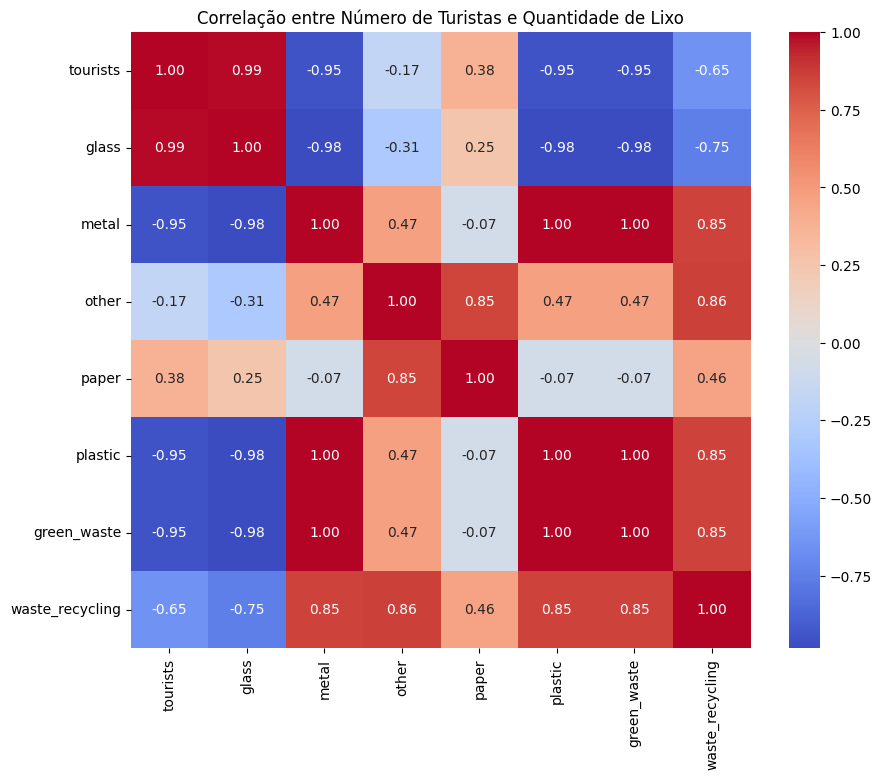

In [76]:
# Calcular a correlação entre o número de turistas e a quantidade de diferentes tipos de lixo
correlacao = dftratado[['tourists', 'glass', 'metal', 'other', 'paper', 'plastic', 'green_waste', 'waste_recycling']].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Número de Turistas e Quantidade de Lixo')
plt.show()

1. **Correlação positiva com turistas e resíduos diversos:** A forte correlação positiva entre o número de turistas e diferentes tipos de resíduos, como vidro, plástico, resíduos orgânicos e reciclagem de resíduos, sugere que áreas com maior afluxo de turistas tendem a produzir mais resíduos em geral.

2. **Correlação negativa com turistas e metal:** A correlação negativa entre o número de turistas e resíduos metálicos pode indicar que áreas com maior atividade turística possuem menos resíduos desse tipo. Isso pode ser resultado de práticas de gestão de resíduos mais eficientes ou de preferências de consumo dos turistas.

3. **Possível relação com o perfil dos turistas:** A análise da relação entre o número de turistas e a composição dos resíduos pode fornecer insights sobre o perfil dos turistas que visitam determinada área. Por exemplo, uma maior presença de turistas pode estar associada a um aumento na produção de resíduos plásticos, sugerindo um padrão de consumo específico.

4. **Impacto na gestão de resíduos:** A forte correlação entre o número de turistas e a quantidade total de resíduos pode destacar a necessidade de estratégias eficazes de gestão de resíduos em destinos turísticos. Isso inclui não apenas a coleta adequada de resíduos, mas também iniciativas de reciclagem e conscientização ambiental.

5. **Potencial para políticas de sustentabilidade:** A análise da relação entre o número de turistas e a quantidade de resíduos pode ajudar na formulação de políticas de sustentabilidade em áreas turísticas. Isso pode envolver a implementação de medidas para reduzir o uso de materiais descartáveis ​​ou incentivar práticas de consumo mais sustentáveis entre os turistas.

Esses pontos destacam a importância de entender como o turismo pode influenciar a geração e o gerenciamento de resíduos em diferentes áreas, visando promover práticas mais sustentáveis ​​e preservar o meio ambiente.


# Novas váriaveis

In [77]:
# Adicionando aleatoriedade aos valores de turistas dentro de uma faixa razoável
np.random.seed(42)  # Para reprodutibilidade
dftratado['tourists'] = np.random.randint(low=10000, high=100000, size=len(df))

# Calcular as novas variáveis
dftratado['lixo_total'] = dftratado[['food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste']].sum(axis=1)
dftratado['interacao_turistas_lixo'] = dftratado['tourists'] * dftratado['lixo_total']

# Corrigir o cálculo de lixo_por_turista para lidar com valores muito altos de tourists
dftratado['lixo_por_turista'] = dftratado['lixo_total'] / (dftratado['tourists'] + 1)

# Verificar os novos valores
print(dftratado[['tourists', 'lixo_total', 'interacao_turistas_lixo', 'lixo_por_turista']].head())


   tourists  lixo_total  interacao_turistas_lixo  lixo_por_turista
0     25795       100.0                2579500.0          0.003877
1     10860       100.0                1086000.0          0.009207
2     86820       100.0                8682000.0          0.001152
3     64886       100.0                6488600.0          0.001541
4     16265       100.0                1626500.0          0.006148


In [79]:
dftratado.head()

,Month,Season,Country,Pollution Level,Sample number,Organic matter%,Mean Number of Nematode species 1 per gram soil,Mean Number of Turbillaria per gram soil,Mean Number of foraminefera per gram soil,Mean Number of Nematode species 2 per gram soil,Water pH,Soil pH,OC,Water Salinity,Soil Salinity,P,Total dissolved solids,PP,Conduction,ORP,Specific resistance,Temp ÃÂ©,Conductivity,Unnamed: 0,code,year,period,id,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,lixo_total,interacao_turistas_lixo,lixo_por_turista
0,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,25795,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,100.0,2579500.0,0.003877
1,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,10860,4.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,100.0,1086000.0,0.009207
2,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,86820,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,100.0,8682000.0,0.001152
3,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,64886,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,100.0,6488600.0,0.001541
4,8,4,1,0,1,0.210246,5.7,0.155556,0.0,0.0,8.055,8.0,7.3,38.5,11.0,28.396893,57500.0,196.3,57400.0,-79.9,17.42,30.12,3.2523,43,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0175,16265,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,100.0,1626500.0,0.006148


#Modelo de Machine Learning

---

Interpretação dos Níveis de Poluição:

- 0: Sem poluição.
- 1: Nível moderado de poluição.
- 2: Alto nível de poluição.

In [81]:
dftratado.rename(columns={
    'Total dissolved solids ': 'Total dissolved solids',
    'Specific resistance ': 'Specific resistance',
    'Quantidade total de resíduos': 'lixo_total',
    'Taxa de geração de resíduos por turista': 'lixo_por_turista'
}, inplace=True)

In [82]:
features = [
    'Organic matter%', 'Mean Number of Nematode species 1 per gram soil', 'Mean Number of Turbillaria per gram soil',
    'Mean Number of foraminefera per gram soil', 'Mean Number of Nematode species 2 per gram soil', 'Water pH',
    'Soil pH', 'OC', 'Water Salinity', 'Soil Salinity', 'P', 'Total dissolved solids', 'PP', 'Conduction',
    'ORP', 'Specific resistance', 'Temp ÃÂ©', 'Conductivity', 'tourists', 'rate', 'food', 'glass', 'metal',
    'other', 'paper', 'plastic', 'leather', 'waste_recycling', 'lixo_total', 'lixo_por_turista'
]

# Verificar se todas as colunas necessárias estão presentes
missing_columns = [col for col in features if col not in dftratado.columns]
if missing_columns:
    print(f"As seguintes colunas estão faltando no DataFrame: {missing_columns}")
else:
    X = dftratado[features]
    y = dftratado['Pollution Level']

    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preencher os valores ausentes com a média de cada coluna
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Inicializar o modelo Random Forest Classifier
    random_forest_classifier = RandomForestClassifier(random_state=42)

    # Treinar o modelo com os dados de treinamento imputados
    random_forest_classifier.fit(X_train_imputed, y_train)

    # Fazer previsões com os dados de teste
    y_pred = random_forest_classifier.predict(X_test_imputed)

    # Avaliar o desempenho do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

Accuracy: 1.0


In [83]:
# Faz a previsão para a única instância
single_prediction = random_forest_classifier.predict(X_test_imputed[2].reshape(1, -1))
print("Single Prediction:", single_prediction)


Single Prediction: [2]


In [84]:
# Faz a previsão para a única instância
single_prediction = random_forest_classifier.predict(X_test_imputed[1].reshape(1, -1))
print("Single Prediction:", single_prediction)


Single Prediction: [0]


In [85]:
# Faz a previsão para a única instância
single_prediction = random_forest_classifier.predict(X_test_imputed[0].reshape(1, -1))
print("Single Prediction:", single_prediction)


Single Prediction: [1]


In [86]:
# Obter as importâncias das características
importances = random_forest_classifier.feature_importances_

# Obter os nomes das características
feature_names = X.columns

# Criar um DataFrame com as características e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar o DataFrame pelas importâncias em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características mais importantes
print("Características mais importantes:")
print(feature_importance_df.head(30))


Características mais importantes:
                                            Feature  Importance
28                                       lixo_total    0.191980
21                                            glass    0.139824
27                                  waste_recycling    0.116777
24                                            paper    0.107938
20                                             food    0.105106
23                                            other    0.099568
25                                          plastic    0.059184
22                                            metal    0.035795
19                                             rate    0.029497
11                           Total dissolved solids    0.021889
17                                     Conductivity    0.017924
8                                    Water Salinity    0.016847
15                              Specific resistance    0.015688
13                                       Conduction    0.013740
0     

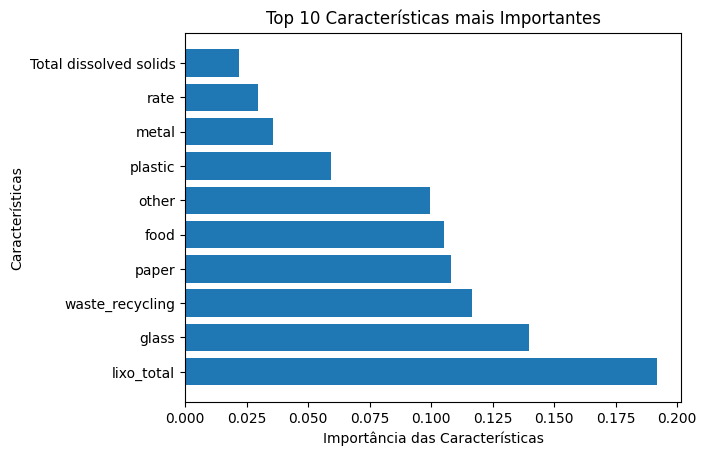

In [87]:
# Selecionar apenas as 10 características mais importantes
top_features = feature_importance_df.head(10)

# Visualização da importância das características
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Importância das Características")
plt.ylabel("Características")
plt.title("Top 10 Características mais Importantes")
plt.show()

### Visualizar os tipos de dados

In [91]:
X_test_imputed[0].reshape(1, -1)

array([[ 5.44617458e-01,  3.90650154e+00,  0.00000000e+00,
         2.56000000e+01,  1.28000000e+01,  8.27400000e+00,
         8.10000000e+00,  9.21000000e+00,  3.85000000e+01,
         1.40000000e+01,  3.02222857e+01,  5.88000000e+04,
         2.41000000e+02,  5.87000000e+04, -8.85000000e+01,
         1.69400000e+01,  1.53000000e+01,  2.14070000e+00,
         9.05480000e+04,  0.00000000e+00,  1.67000000e+01,
         2.20000000e+00,  3.50000000e+00,  2.82000000e+01,
         1.89000000e+01,  2.02000000e+01,  0.00000000e+00,
         2.72500000e+01,  9.24000000e+01,  1.02044197e-03]])

In [92]:
X_test_imputed[1].reshape(1, -1)

array([[ 7.07659941e-01,  3.52919787e-01,  1.17639929e-01,
         1.28000000e+01,  0.00000000e+00,  8.02800000e+00,
         8.46050000e+00,  8.39000000e+00,  3.94000000e+01,
         1.00000000e+01,  2.93966024e+01,  5.90000000e+04,
         2.26000000e+02,  5.90000000e+04, -6.40000000e+01,
         1.69400000e+01,  2.01000000e+01,  5.23490000e+00,
         3.91400000e+04,  0.00000000e+00,  3.20000000e+01,
         1.00000000e+01,  3.00000000e+00,  2.60000000e+01,
         2.00000000e+01,  9.00000000e+00,  0.00000000e+00,
         2.22600000e+01,  1.00000000e+02,  2.55486574e-03]])

In [93]:
X_test_imputed[2].reshape(1, -1)

array([[ 7.15166061e-01,  1.99467010e+00,  0.00000000e+00,
         4.48000000e+01,  9.60000000e+00,  8.25000000e+00,
         8.20000000e+00,  8.69000000e+00,  3.68000000e+01,
         1.25000000e+01,  2.10638419e+01,  5.63000000e+04,
         2.32000000e+02,  5.62000000e+04, -8.72000000e+01,
         1.78100000e+01,  1.67000000e+01,  3.05500000e+00,
         2.65560000e+04,  8.71589237e+01,  4.90000000e+01,
         8.00000000e+00,  3.00000000e+00,  1.40000000e+01,
         1.50000000e+01,  9.00000000e+00,  0.00000000e+00,
         1.68400000e+01,  9.80000000e+01,  3.69017585e-03]])

# Entrada de dados que simule um resultado do tipo 0:

In [103]:
dados0 = np.array([[0.7, 0.35, 0.12, 12.8, 0.0, 8.028,
                    8.4605, 8.39, 39.4, 10.0, 29.3966024, 59000.0,
                    226.0, 59000.0, -64.0, 16.94, 20.1, 5.2349,
                    39140.0, 0.0, 32.0, 10.0, 3.0, 26.0,
                    20.0, 9.0, 0.0, 22.26, 100.0, 0.00255486574]])

# Imputar os valores simulados (se necessário)
dados1_imputed = imputer.transform(dados0)

# Fazer previsão com o modelo treinado
previsao_dados0 = random_forest_classifier.predict(dados1_imputed)

print("Previsão para a entrada 'dados0':", previsao_dados0)

Previsão para a entrada 'dados0': [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# Entrada de dados que simule um resultado do tipo 1:

In [107]:
entrada_simulada1 = np.array([[0.2, 3.7, 0.0, 2.6, 12.8, 8.274,
                              8.1, 9.21, 38.5, 14.0, 30.2222857, 58800.0,
                              241.0, 58700.0, -88.5, 16.94, 15.3, 2.1407,
                              90548.0, 0.0, 16.7, 2.2, 3.5, 28.2,
                              18.9, 20.2, 0.0, 27.25, 92.4, 0.00107]])

# Imputar os valores simulados (se necessário)
entrada_simulada_imputed = imputer.transform(entrada_simulada1)

# Fazer previsão com o modelo treinado
previsao = random_forest_classifier.predict(entrada_simulada_imputed)

print("Previsão para a entrada simulada:", previsao)

Previsão para a entrada simulada: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# Entrada de dados que simule um resultado do tipo 2:

In [108]:
dados2 = np.array([[0.716166061, 1.9945701, 0.001, 44.5, 9.7, 8.2,
                    8.1, 8.7, 36.9, 12.6, 21.1638419, 56350.0,
                    231.0, 56250.0, -87.3, 17.82, 16.8, 3.056,
                    26560.0, 87.1589238, 49.2, 8.1, 2.9, 14.2,
                    15.1, 9.1, 0.1, 16.85, 98.1, 0.00369027585]])

# Imputar os valores simulados (se necessário)
dados2_imputed = imputer.transform(dados2)

# Fazer previsão com o modelo treinado
previsao_dados2 = random_forest_classifier.predict(dados2_imputed)

print("Previsão para a entrada 'dados2':", previsao_dados2)

Previsão para a entrada 'dados2': [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# Testes e conclusão

As principais diferenças entre esses conjuntos de dados utilizados como entrada de dados para os testes, incluem as características dos solos (como a quantidade de matéria orgânica e os diferentes tipos e quantidades de organismos presentes), as propriedades físico-químicas da água (pH, salinidade, sólidos dissolvidos totais) e a quantidade e tipo de resíduos presentes nas praias (vidro, plástico, papel, metal, entre outros). Essas diferenças podem influenciar significativamente as previsões do modelo, como comprovado acima.

Ao desenvolver o modelo e testá-lo com conjuntos de dados variados, foi possível observar padrões consistentes que corroboram a ideia inicial do projeto: quanto maior a quantidade de turistas, maior a presença de resíduos nas praias e, consequentemente, maior o nível de poluição. As características específicas dos solos e da água, juntamente com a quantidade e o tipo de resíduos, forneceram insights valiosos sobre como diferentes variáveis estão inter-relacionadas e como contribuem para os níveis de poluição.

Portanto, ao analisar os resultados do modelo em conjunto com a diversidade de dados de teste, foi possível confirmar a hipótese inicial de que a presença de turistas está correlacionada positivamente com os níveis de poluição nas praias, fornecendo uma base sólida para intervenções e políticas de gestão ambiental costeira.